<a href="https://colab.research.google.com/github/sherif17/Credit-Card-Clustering-Market-Segmentation/blob/main/Credit_Card_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import chardet as cdt
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns

### **About Dataset**

This case requires to develop a customer segmentation to define marketing strategy. The
sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :-


---


**CUST_ID :** Identification of Credit Card holder (Categorical)


**BALANCE :** Balance amount left in their account to make purchases (
BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)


**PURCHASES :** Amount of purchases made from account


**ONEOFF_PURCHASES :** Maximum purchase amount done in one-go


**INSTALLMENTS_PURCHASES :**Amount of purchase done in installment


**CASH_ADVANCE :** Cash in advance given by the user

**PURCHASES_FREQUENCY :** How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

**ONEOFFPURCHASESFREQUENCY :** How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

**PURCHASESINSTALLMENTSFREQUENCY :** How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

**CASHADVANCEFREQUENCY :** How frequently the cash in advance being paid

**CASHADVANCETRX :** Number of Transactions made with "Cash in Advanced"

**PURCHASES_TRX :** Numbe of purchase transactions made

**CREDIT_LIMIT :** Limit of Credit Card for user

**PAYMENTS :** Amount of Payment done by user
**MINIMUM_PAYMENTS :** Minimum amount of payments made by user
**PRCFULLPAYMENT :** Percent of full payment paid by user
**TENURE :** Tenure of credit card service for user

### **Reading DataSet**

In [ ]:
df = pd.read_csv("/content/CC GENERAL.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### **Data Cleaning and Formatting**

In [ ]:
print('This dataset contains {} rows and {} columns'.format(df.shape[0],df.shape[1]))

This dataset contains 8950 rows and 18 columns


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Let's check for NaN values within the entire dataframe.

In [ ]:
# Let's check for NaN values within the entire dataframe
df.isna().sum().sort_values(ascending = False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
CUST_ID                               0
BALANCE                               0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
TENURE                                0
dtype: int64

Dealing with Missing Values

In [ ]:
# Dealing with Missing Values
df.loc[(df['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']=df['MINIMUM_PAYMENTS'].mean()
df.loc[(df['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT']=df['CREDIT_LIMIT'].mean()

In [ ]:
# Let's check for NaN values within the entire dataframe
df.isna().sum().sort_values(ascending = False)

CUST_ID                             0
BALANCE                             0
PRC_FULL_PAYMENT                    0
MINIMUM_PAYMENTS                    0
PAYMENTS                            0
CREDIT_LIMIT                        0
PURCHASES_TRX                       0
CASH_ADVANCE_TRX                    0
CASH_ADVANCE_FREQUENCY              0
PURCHASES_INSTALLMENTS_FREQUENCY    0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_FREQUENCY                 0
CASH_ADVANCE                        0
INSTALLMENTS_PURCHASES              0
ONEOFF_PURCHASES                    0
PURCHASES                           0
BALANCE_FREQUENCY                   0
TENURE                              0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Customer ID seems to be an unique id for each customer and hence won't play any role in determining the cluster.

In [ ]:
df.drop(['CUST_ID'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

### **Data Pre-processing**

Let's visualize how skewed our dataset is.

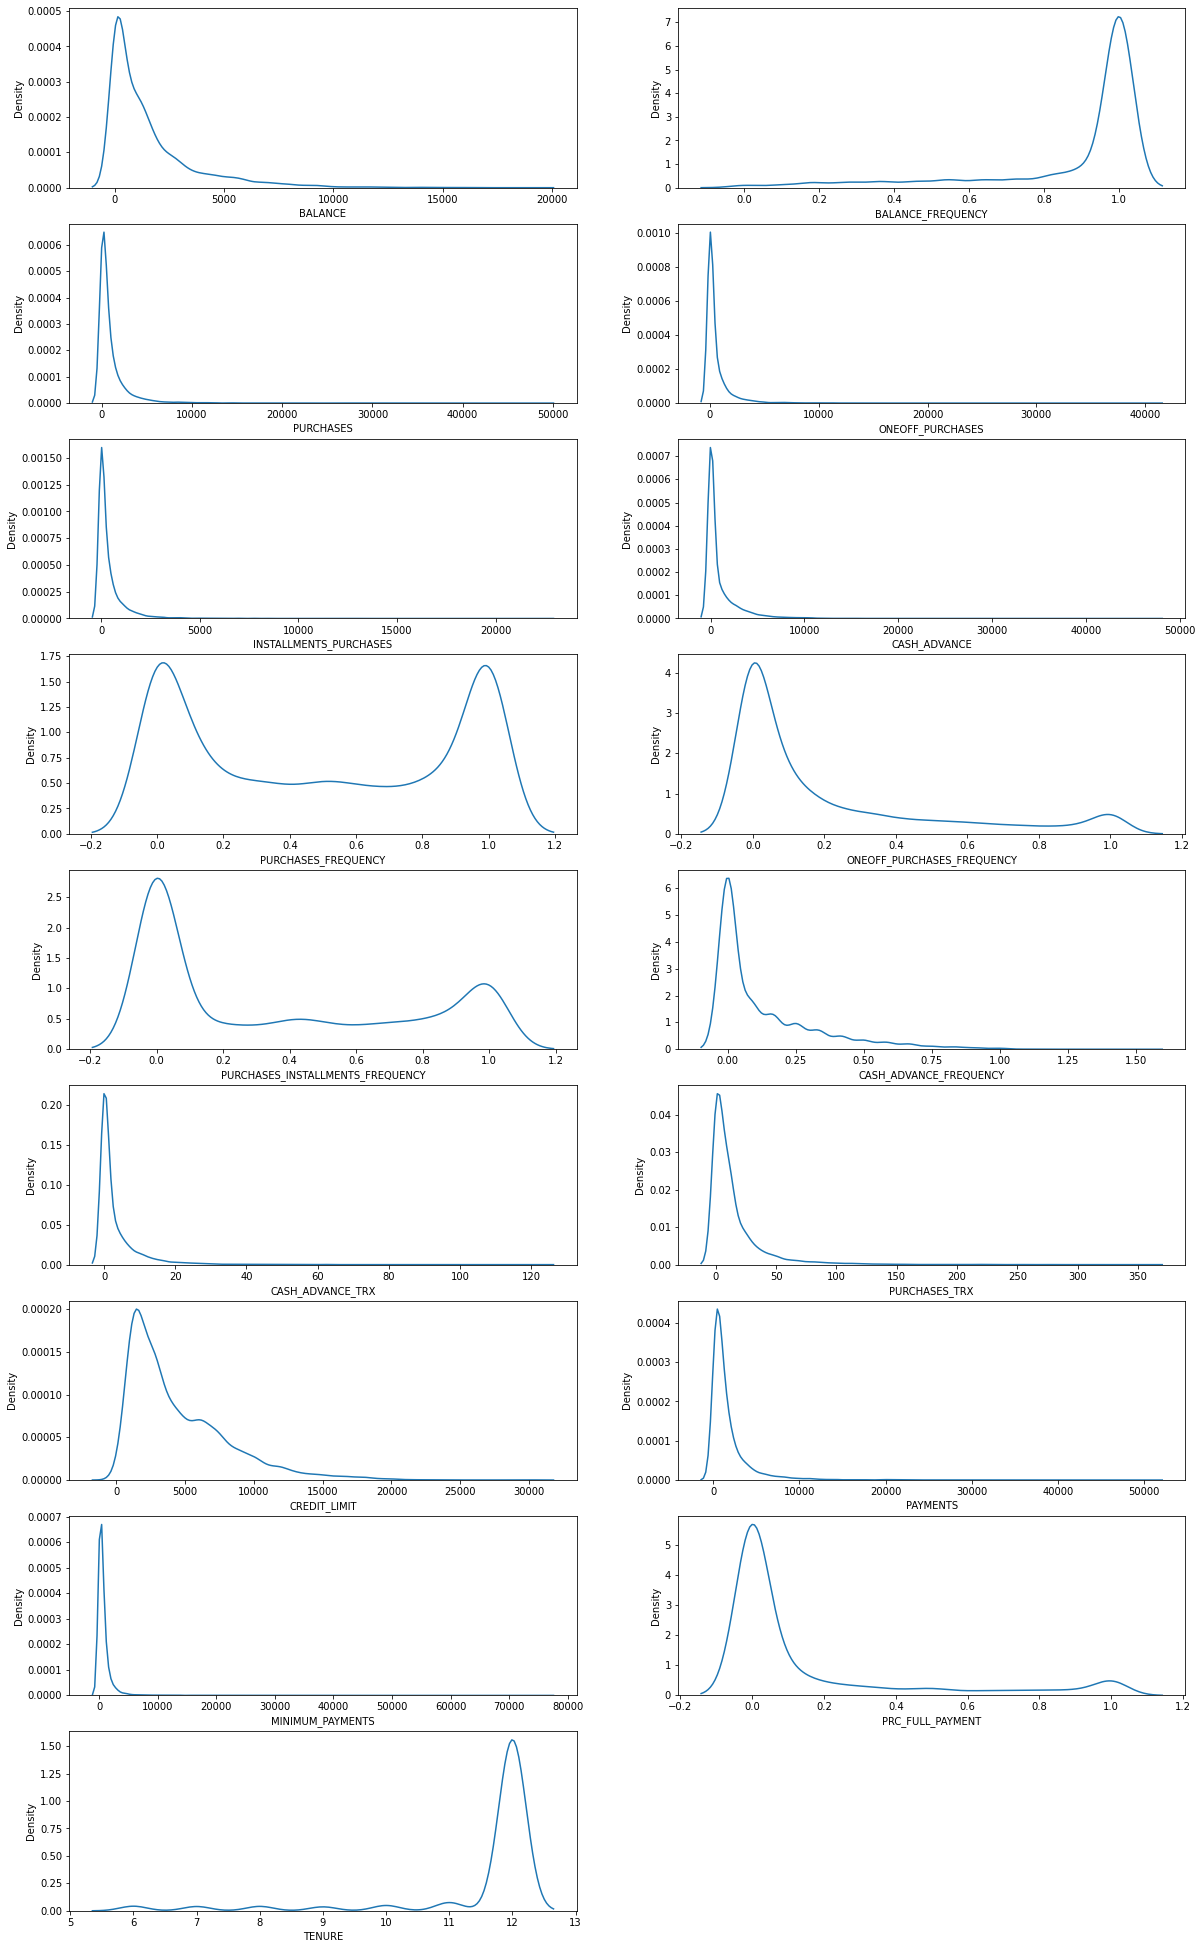

In [ ]:
plt.figure(figsize=(20,35))
for i, col in enumerate(df.columns):
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scale = StandardScaler()
# X = scale.fit_transform(df)
# X.shape

In [ ]:
# df=pd.DataFrame(X,columns=df.columns)
# df

Handling  some skeweed to help the model to form better clusters.

In [ ]:
sk_cols = ['BALANCE', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']

In [ ]:
for col in sk_cols:
    df[col] = np.log(1 + df[col])

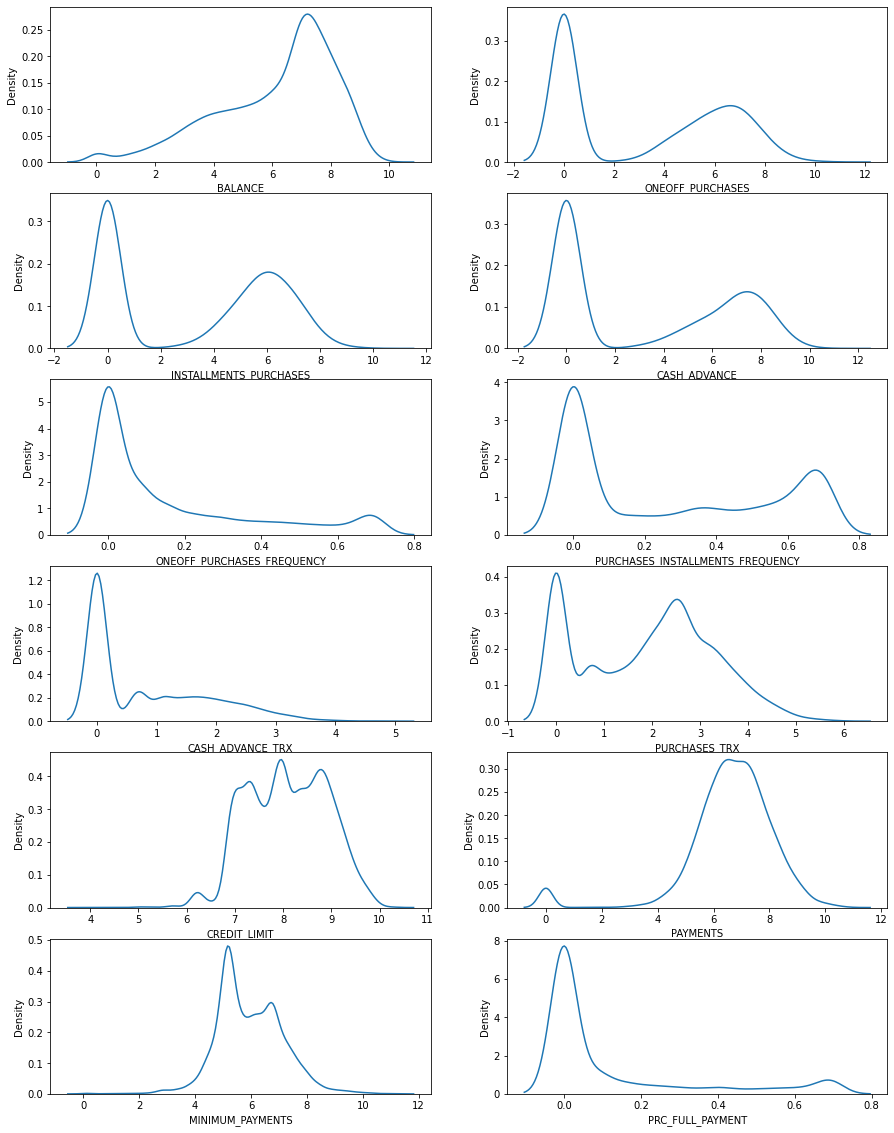

In [ ]:
# After handling skweenes cols
plt.figure(figsize=(15,20))
for i, col in enumerate(sk_cols):
    ax = plt.subplot(6, 2, i+1)
    sns.kdeplot(df[col], ax=ax)
plt.show()

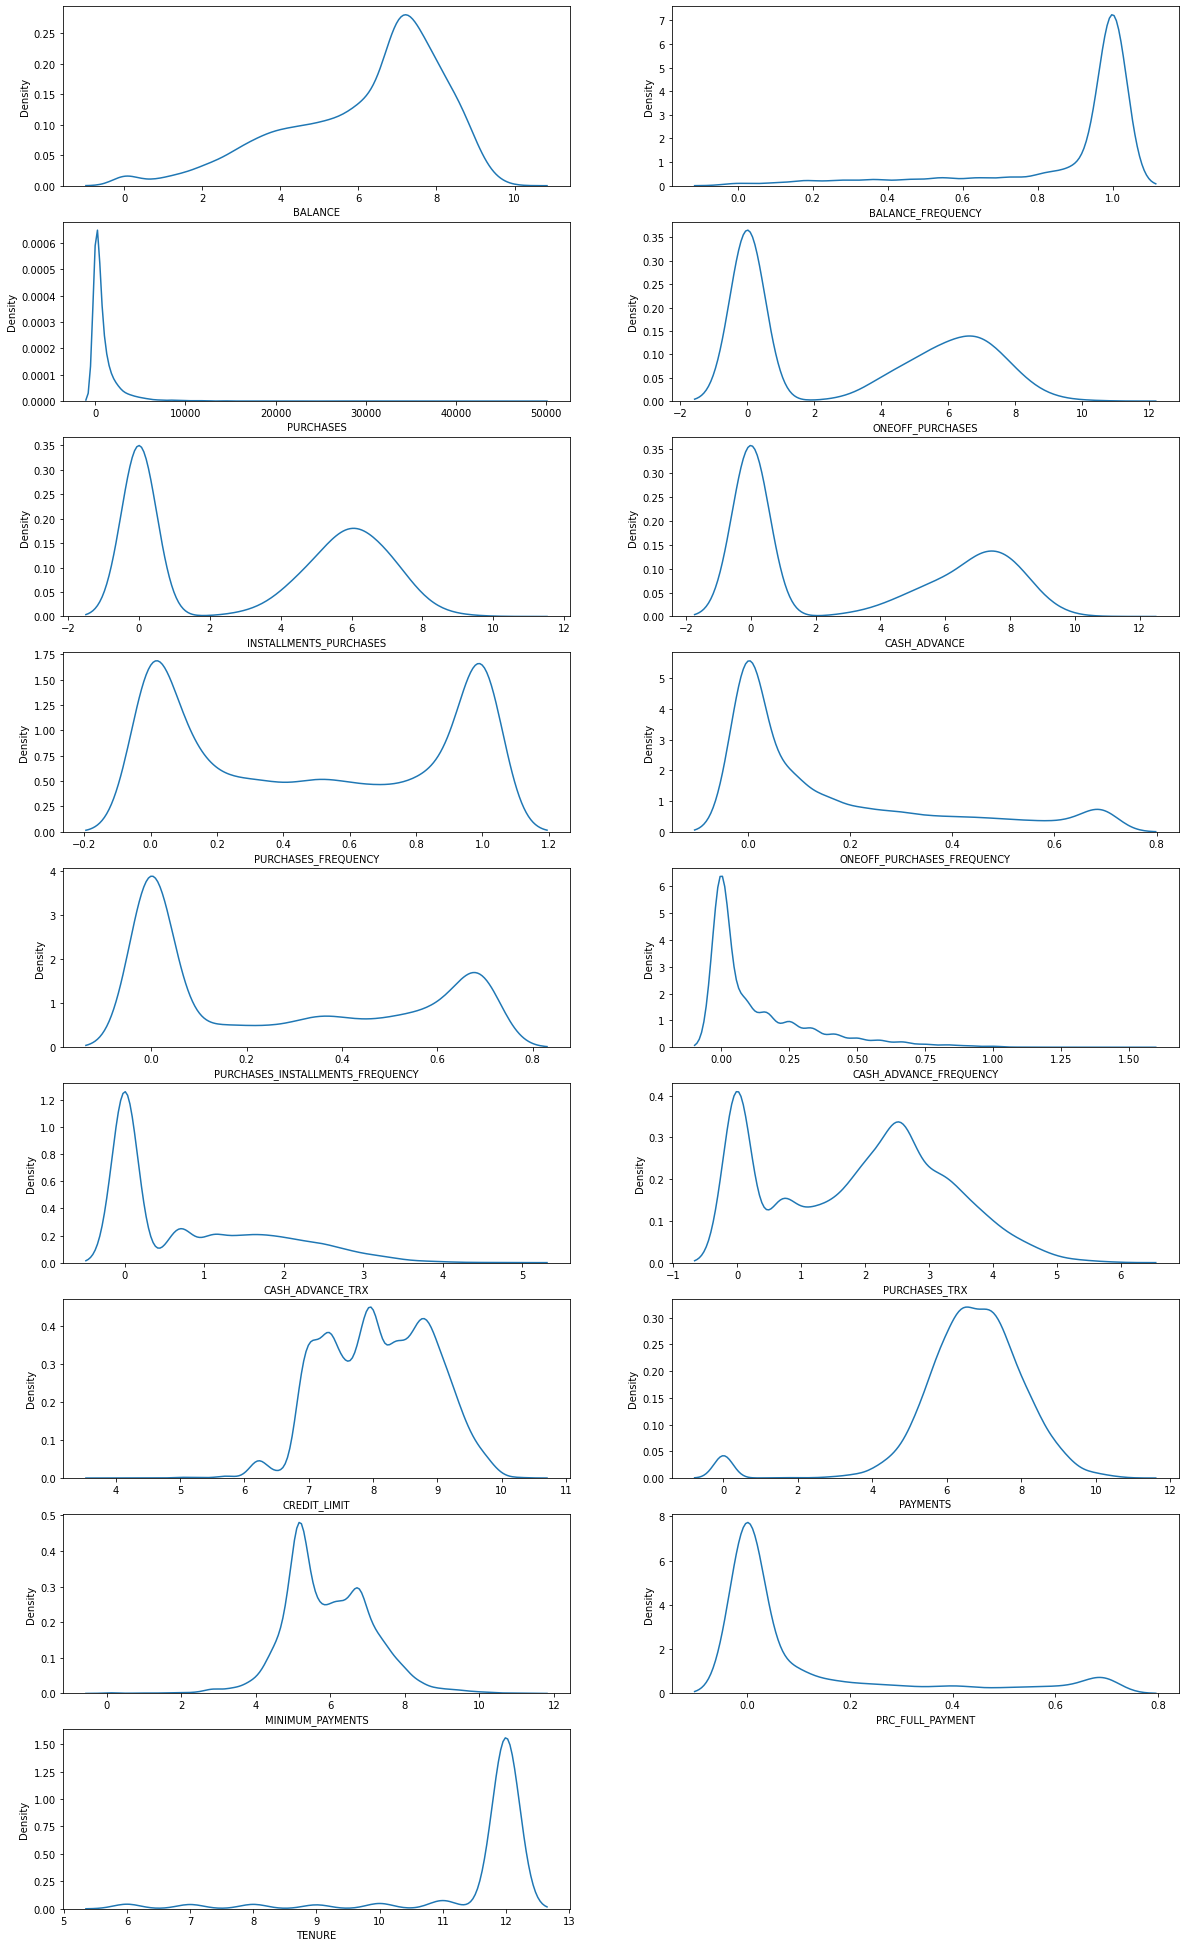

In [ ]:
# All the cols
plt.figure(figsize=(20,35))
for i, col in enumerate(df.columns):
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

### Finds Corrolation between coloums

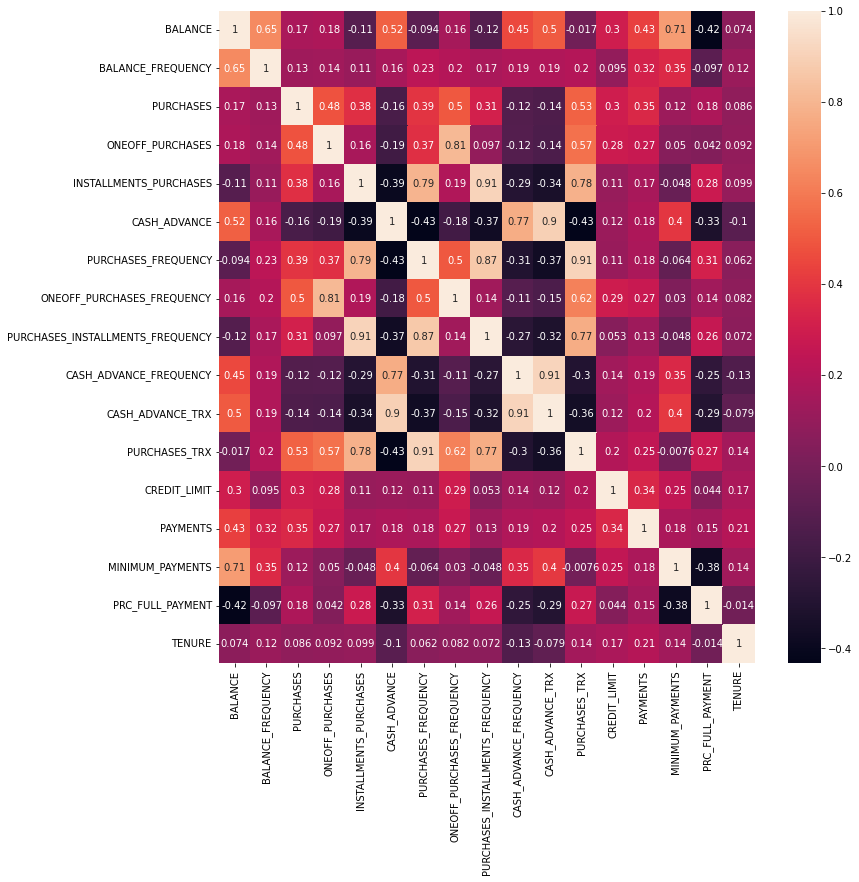

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

**Applying PCA**

We will select the number of components such that our data in the lower dimensions explains 95% of variance of our original data.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=7)
X_red = pca.fit_transform(df)
X_red

array([[-9.07806312e+02, -4.27579488e+00,  3.38199619e+00, ...,
         3.12276155e-02, -2.41993286e-01, -5.37298457e-01],
       [-1.00320966e+03,  6.92892456e+00,  1.45707432e+00, ...,
        -1.41480412e+00, -1.19610817e+00,  3.22837120e-01],
       [-2.30032423e+02, -1.47890321e+00, -4.33138899e+00, ...,
        -2.58020357e+00,  9.62243853e-01, -4.09945582e-03],
       ...,
       [-8.58806491e+02, -4.74977562e+00,  3.87790240e+00, ...,
         3.15277321e+00,  2.92864773e+00,  3.57263182e+00],
       [-1.00321111e+03,  4.20678654e-01,  3.73972230e+00, ...,
         4.44640844e+00,  2.15604514e+00,  3.11614499e+00],
       [ 9.00449244e+01,  1.69843206e+00, -3.33022535e+00, ...,
         4.60360033e+00,  3.49705399e+00,  2.80870931e+00]])

## **Comparing Model**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

from sklearn.cluster import AgglomerativeClustering


%matplotlib inline

### **Determining Best k**

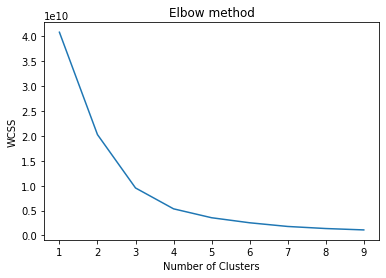

In [ ]:
from sklearn.cluster import KMeans

kmeans_models = [KMeans(n_clusters=k, random_state=23).fit(X_red) for k in range (1, 10)]
innertia = [model.inertia_ for model in kmeans_models]

plt.plot(range(1, 10), innertia)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

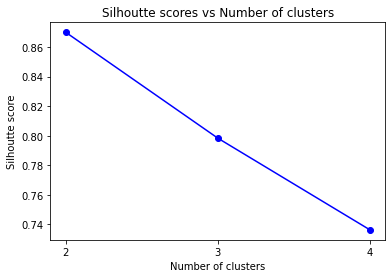

In [ ]:
silhoutte_scores = [silhouette_score(X_red, model.labels_) for model in kmeans_models[1:4]]
plt.plot(range(2,5), silhoutte_scores, "bo-")
plt.xticks([2, 3, 4])
plt.title('Silhoutte scores vs Number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.show()

### **DBSCAN**

In [ ]:
db = DBSCAN(eps = 200, min_samples = 4).fit(X_red)
df["DBSCAN"] = db.labels_
print('Silhoutte score of DBSCAN model is ' + str(silhouette_score(X_red, db.labels_)))

Silhoutte score of DBSCAN model is 0.8385397086480386


### **KMeans**

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=23).fit(X_red)
df["KMeans"] = kmeans.labels_
print('Silhoutte score of kmeans model is ' + str(silhouette_score(X_red, kmeans.labels_)))

Silhoutte score of kmeans model is 0.8700134342600904


### **Hierarchy**

In [ ]:
hac = AgglomerativeClustering(2).fit(X_red)
df["hac"] = hac.labels_
print('Silhoutte score of Hierarchy model is ' + str(silhouette_score(X_red, hac.labels_)))

Silhoutte score of Hierarchy model is 0.7658777805127549


### **GaussianMixture**

In [ ]:
gm = GaussianMixture(2).fit(X_red)
df["gm"] = gm.predict(X_red)
print('Silhoutte score of GaussianMixture model is ' + str(silhouette_score(X_red, gm.predict(X_red))))

Silhoutte score of GaussianMixture model is 0.27575623641452224


Getting back to oreginal values

In [ ]:
for col in sk_cols:
    df[col] = np.exp(df[col])

In [ ]:
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,DBSCAN,KMeans,hac,gm
0,41.900749,0.818182,95.40,1.00,96.40,1.000000,0.166667,1.000000,1.083333,0.000000,...,3.0,1001.0,202.802084,140.509787,1.000000,12,0,0,1,0
1,3203.467416,0.909091,0.00,1.00,1.00,6443.945483,0.000000,1.000000,1.000000,0.250000,...,1.0,7001.0,4104.032597,1073.340217,1.222222,12,0,0,1,0
2,2496.148862,1.000000,773.17,774.17,1.00,1.000000,1.000000,2.000000,1.000000,0.000000,...,13.0,7501.0,623.066742,628.284787,1.000000,12,0,0,1,1
3,1667.670542,0.636364,1499.00,1500.00,1.00,206.788017,0.083333,1.083333,1.000000,0.083333,...,2.0,7501.0,1.000000,865.206542,1.000000,12,0,0,1,0
4,818.714335,1.000000,16.00,17.00,1.00,1.000000,0.083333,1.083333,1.000000,0.000000,...,2.0,1201.0,679.334763,245.791237,1.000000,12,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,29.493517,1.000000,291.12,1.00,292.12,1.000000,1.000000,1.000000,1.833333,0.000000,...,7.0,1001.0,326.594462,49.886365,1.500000,6,0,0,1,0
8946,20.183215,1.000000,300.00,1.00,301.00,1.000000,1.000000,1.000000,1.833333,0.000000,...,7.0,1001.0,276.861322,865.206542,1.000000,6,0,0,1,0
8947,24.398673,0.833333,144.40,1.00,145.40,1.000000,0.833333,1.000000,1.666667,0.000000,...,6.0,1001.0,82.270775,83.418369,1.250000,6,0,0,1,0
8948,14.457564,0.833333,0.00,1.00,1.00,37.558778,0.000000,1.000000,1.000000,0.166667,...,1.0,501.0,53.549959,56.755628,1.250000,6,0,0,1,0


### **Selected Graphes**

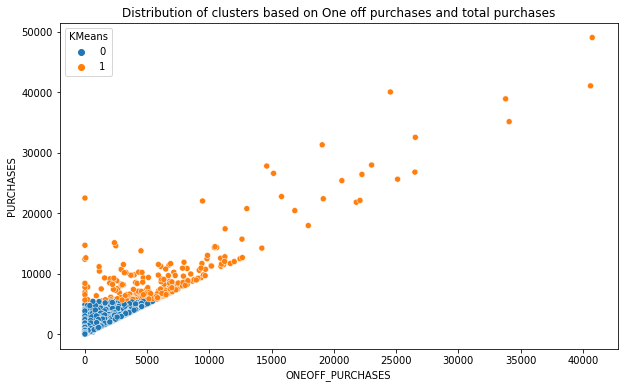

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='ONEOFF_PURCHASES', y='PURCHASES', hue='KMeans')
plt.title('Distribution of clusters based on One off purchases and total purchases')
plt.show()

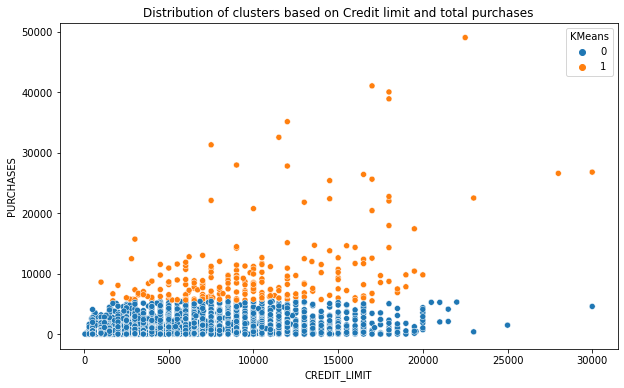

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='CREDIT_LIMIT', y='PURCHASES', hue='KMeans')
plt.title('Distribution of clusters based on Credit limit and total purchases')
plt.show()